公式: $y = m_{1}x_{1} + m_{2}x_{2} + m_{3}x_{3} + ... + m_{n}x_{n}$

小 project: 使用本書提供的 ```Housing_Modified.csv``` 檔案來做 multivariate Regression

# 1. 搞清楚資料內容與型態:

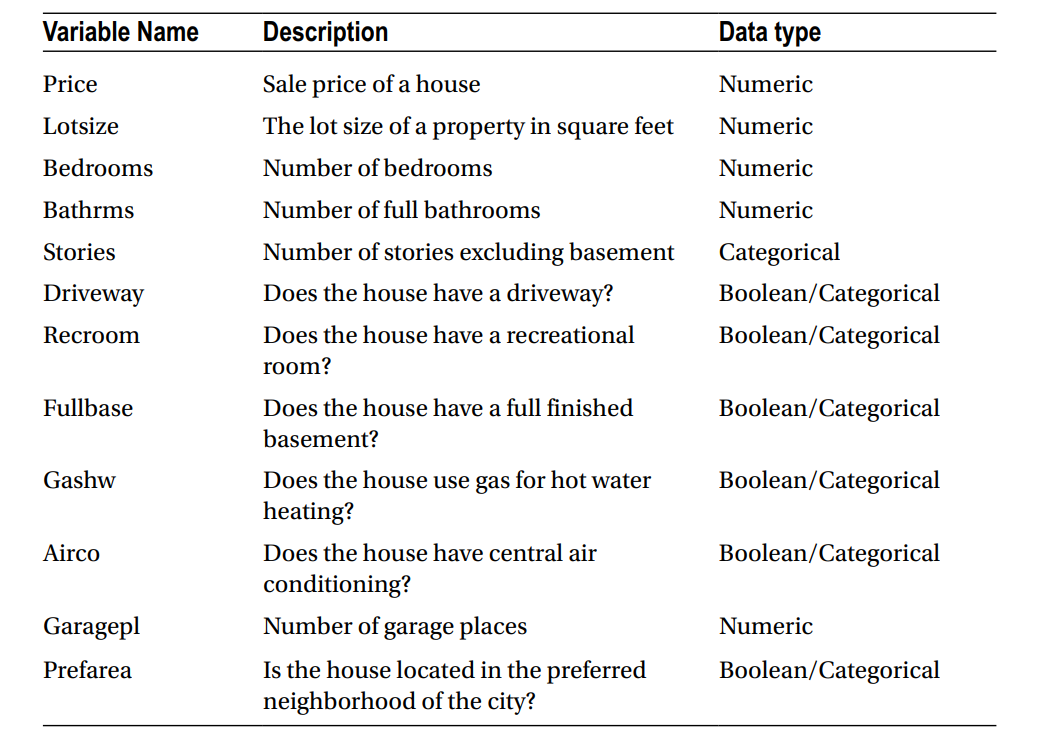

# 2. 處理 <font color='red'> categorical data </font>:

從上圖可以看到，```Stories```、```Driveway```、```Recroom```、```Fullbase```、```Gashw```、```Airco```、```Prefarea``` 都是 categorical data

而要將 categorical data 轉成 numerical data，有四種方法:  
- (Scikit Learn 裡的) Label Binarizer: replace the binary variable text with numeric vales
- (Scikit Learn 裡的) Label Encoder: replace category level with number representation
- (Scikit Learn 裡的) One Hot Encoder: convert n levels to n-1 new variable, and the new variables will use 1 to indicate the presence of level and 0 for otherwise (注意: 用 One Hot Encoder 時資料必須已經是 number 了)
- (Pandas 的) ```get_dummies()``` 

# 3. 處理 Multicollinearity 問題:

方法: 檢測 $VIF (Variation\ Inflation\ Factor)$:
$$VIF_{i} = \frac{1}{1-R_{i}}$$

有關於膨脹因子，簡單來說就是各個解釋變數 ($x_{i}$) 之間是否相關。  
Rule of thumb: 任何一個解釋變數 ($x_{i}$) 超過 10，就把那個變數刪除。

---

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv(r"C:\Users\User\Machine_Learning\mastering-ml-w-python-in-six-steps-master\Chapter_3_Code\Code\Data\Housing_modified.csv")

In [5]:
df

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,two,yes,no,yes,no,no,1,no
1,38500.0,4000,2,1,one,yes,no,no,no,no,0,no
2,49500.0,3060,3,1,one,yes,no,no,no,no,0,no
3,60500.0,6650,3,1,two,yes,yes,no,no,no,0,no
4,61000.0,6360,2,1,one,yes,no,no,no,no,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...
541,91500.0,4800,3,2,four,yes,yes,no,no,yes,0,no
542,94000.0,6000,3,2,four,yes,no,no,no,yes,0,no
543,103000.0,6000,3,2,four,yes,yes,no,no,yes,1,no
544,105000.0,6000,3,2,two,yes,yes,no,no,yes,1,no


In [6]:
from sklearn import preprocessing

In [7]:
lb = preprocessing.LabelBinarizer()

In [8]:
df.driveway = lb.fit_transform(df.driveway)

In [9]:
df # 發現 driveway 被改成數字型態了! 

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,two,1,no,yes,no,no,1,no
1,38500.0,4000,2,1,one,1,no,no,no,no,0,no
2,49500.0,3060,3,1,one,1,no,no,no,no,0,no
3,60500.0,6650,3,1,two,1,yes,no,no,no,0,no
4,61000.0,6360,2,1,one,1,no,no,no,no,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...
541,91500.0,4800,3,2,four,1,yes,no,no,yes,0,no
542,94000.0,6000,3,2,four,1,no,no,no,yes,0,no
543,103000.0,6000,3,2,four,1,yes,no,no,yes,1,no
544,105000.0,6000,3,2,two,1,yes,no,no,yes,1,no


In [10]:
# 將所有類別資料量化
df.driveway = lb.fit_transform(df.driveway)
df.recroom = lb.fit_transform(df.recroom)
df.fullbase = lb.fit_transform(df.fullbase)
df.gashw = lb.fit_transform(df.gashw)
df.airco = lb.fit_transform(df.airco)
df.prefarea = lb.fit_transform(df.prefarea)

In [11]:
df

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,two,1,0,1,0,0,1,0
1,38500.0,4000,2,1,one,1,0,0,0,0,0,0
2,49500.0,3060,3,1,one,1,0,0,0,0,0,0
3,60500.0,6650,3,1,two,1,1,0,0,0,0,0
4,61000.0,6360,2,1,one,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
541,91500.0,4800,3,2,four,1,1,0,0,1,0,0
542,94000.0,6000,3,2,four,1,0,0,0,1,0,0
543,103000.0,6000,3,2,four,1,1,0,0,1,1,0
544,105000.0,6000,3,2,two,1,1,0,0,1,1,0


注意到 ```stories```，雖然他也是 categorical data，但他不是布林值，因此不能套用 ```lb.fit_transform()```    
我們用 ```pandas``` 裡的 ```get_dummies()``` 方法。

In [12]:
df_stories = pd.get_dummies(df['stories'], prefix='Story', drop_first=False)

In [13]:
df_stories

,Story_four,Story_one,Story_three,Story_two
0,0,0,0,1
1,0,1,0,0
2,0,1,0,0
3,0,0,0,1
4,0,1,0,0
...,...,...,...,...
541,1,0,0,0
542,1,0,0,0
543,1,0,0,0
544,0,0,0,1


如此一來，我們就把原本的 ```df['stories']``` 資料轉成一個全新的 dataframe。  
但注意到現在有四個 dummy 變數 (```Story_four```, ```Story_one```, ```Story_three```, ```Story_two```)。但其實我們只需要有三個變數即可 (如果某間房子，他的 ```Story_four```, ```Story_one```, ```Story_three``` 都是 0，那他就一定是 2 個 stories)。  
因此我們可以設定 ```drop_first``` 參數為 ```True```。

In [14]:
df_stories = pd.get_dummies(df['stories'], prefix='Story', drop_first=True)

In [15]:
df_stories

,Story_one,Story_three,Story_two
0,0,0,1
1,1,0,0
2,1,0,0
3,0,0,1
4,1,0,0
...,...,...,...
541,0,0,0
542,0,0,0
543,0,0,0
544,0,0,1


In [16]:
df = pd.concat([df, df_stories], axis=1) # 把新的 data frame 加入原 data frame 中，並把 stories colum 刪除

In [17]:
df

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,Story_one,Story_three,Story_two
0,42000.0,5850,3,1,two,1,0,1,0,0,1,0,0,0,1
1,38500.0,4000,2,1,one,1,0,0,0,0,0,0,1,0,0
2,49500.0,3060,3,1,one,1,0,0,0,0,0,0,1,0,0
3,60500.0,6650,3,1,two,1,1,0,0,0,0,0,0,0,1
4,61000.0,6360,2,1,one,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,91500.0,4800,3,2,four,1,1,0,0,1,0,0,0,0,0
542,94000.0,6000,3,2,four,1,0,0,0,1,0,0,0,0,0
543,103000.0,6000,3,2,four,1,1,0,0,1,1,0,0,0,0
544,105000.0,6000,3,2,two,1,1,0,0,1,1,0,0,0,1


In [18]:
del df['stories']

In [19]:
df

,price,lotsize,bedrooms,bathrms,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,Story_one,Story_three,Story_two
0,42000.0,5850,3,1,1,0,1,0,0,1,0,0,0,1
1,38500.0,4000,2,1,1,0,0,0,0,0,0,1,0,0
2,49500.0,3060,3,1,1,0,0,0,0,0,0,1,0,0
3,60500.0,6650,3,1,1,1,0,0,0,0,0,0,0,1
4,61000.0,6360,2,1,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,91500.0,4800,3,2,1,1,0,0,1,0,0,0,0,0
542,94000.0,6000,3,2,1,0,0,0,1,0,0,0,0,0
543,103000.0,6000,3,2,1,1,0,0,1,1,0,0,0,0
544,105000.0,6000,3,2,1,1,0,0,1,1,0,0,0,1


資料都是數值型態後，就可以開始分析了

In [20]:
import statsmodels.api as sm

In [21]:
corr = df.corr()
corr

,price,lotsize,bedrooms,bathrms,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,Story_one,Story_three,Story_two
price,1.000000,0.535796,0.366447,0.516719,0.297167,0.254960,0.186218,0.092837,0.453347,0.383302,0.329074,-0.270058,0.138254,-0.002089
lotsize,0.535796,1.000000,0.151851,0.193833,0.288778,0.140327,0.047487,-0.009201,0.221765,0.352872,0.234782,0.054348,0.020567,-0.159612
bedrooms,0.366447,0.151851,1.000000,0.373769,-0.011996,0.080492,0.097201,0.046028,0.160412,0.139117,0.078953,-0.509974,0.099150,0.377424
bathrms,0.516719,0.193833,0.373769,1.000000,0.041955,0.126892,0.102791,0.067365,0.184955,0.178178,0.064013,-0.250784,0.036027,0.080982
driveway,0.297167,0.288778,-0.011996,0.041955,1.000000,0.091959,0.043428,-0.011942,0.106290,0.203682,0.199378,-0.053249,0.073533,-0.047074
recroom,0.254960,0.140327,0.080492,0.126892,0.091959,1.000000,0.372434,-0.010119,0.136626,0.038122,0.161292,-0.022632,-0.038733,0.006938
fullbase,0.186218,0.047487,0.097201,0.102791,0.043428,0.372434,1.000000,0.004677,0.045248,0.052524,0.228651,0.059154,-0.132540,0.098694
gashw,0.092837,-0.009201,0.046028,0.067365,-0.011942,-0.010119,0.004677,1.000000,-0.130350,0.068144,-0.059170,-0.060336,0.072922,0.054823
airco,0.453347,0.221765,0.160412,0.184955,0.106290,0.136626,0.045248,-0.130350,1.000000,0.156596,0.115626,-0.143174,0.110682,-0.074706
garagepl,0.383302,0.352872,0.139117,0.178178,0.203682,0.038122,0.052524,0.068144,0.156596,1.000000,0.092364,0.016610,-0.079170,-0.041931


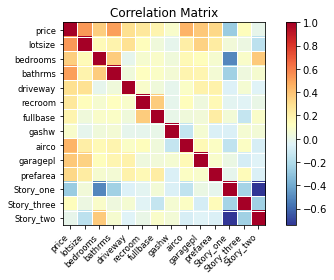

In [22]:
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

從上面的 Correlation matrix 我們注意到 story one 跟 story two 有滿顯著的負相關  
因此下面對所有變數都做 $VIF$ 檢測。

In [23]:
df.columns

Index(['price', 'lotsize', 'bedrooms', 'bathrms', 'driveway', 'recroom',
       'fullbase', 'gashw', 'airco', 'garagepl', 'prefarea', 'Story_one',
       'Story_three', 'Story_two'],
      dtype='object')

In [24]:
# 注意到我們只是把 price (被解釋變數) 拿掉
independent_variables = ['lotsize', 'bedrooms', 'bathrms','driveway', \
                         'recroom', 'fullbase','gashw','airco','garagepl', \
                         'prefarea', 'Story_two','Story_one','Story_three']

In [25]:
X = df[independent_variables]
Y = df.price

In [24]:
thresh = 10 # thresh stands for threshold (門檻值; 閥值)

```statsmodels``` 裡的 ```variance_inflation_factor``` 方法終須提供兩個參數，分別是:  
- ```exog``` : <font color='red'>an array containing features</font> on which linear regression is performed.  
- ```exog_idx``` : <font color='red'>index of the additional feature</font> whose influence on the other features is to be measured.

In [25]:
X[independent_variables].values # this is the array we want to perform lr

array([[5850,    3,    1, ...,    1,    0,    0],
       [4000,    2,    1, ...,    0,    1,    0],
       [3060,    3,    1, ...,    0,    1,    0],
       ...,
       [6000,    3,    2, ...,    0,    0,    0],
       [6000,    3,    2, ...,    1,    0,    0],
       [6000,    3,    1, ...,    1,    0,    0]], dtype=int64)

In [29]:
X[independent_variables].shape

(546, 13)

In [30]:
X[independent_variables].shape[1] # these are the index (也就是對每個 Column，都要跟別人做一次 VIF 測試)

13

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [32]:
egg = [variance_inflation_factor(X[independent_variables].values, ix) for ix in range(X[independent_variables].shape[1])]

In [33]:
egg

[8.958098087844336,
 18.469878559519948,
 8.984672347290864,
 7.088578542091886,
 1.4770152815033917,
 2.013320236472386,
 1.1034879198994194,
 1.7567462065609025,
 1.9826489313438442,
 1.5332946465459893,
 5.511702408354892,
 3.965752674786861,
 1.7700402770614867]

In [36]:
type(egg)

<built-in method index of list object at 0x00000234F885DBC0>


In [37]:
a = egg.index(max(egg)) # 用 list 裡的 .index() 可以找到特定元素的 index
a

1

```egg``` 是一個變數對其他變數做 $VIF$ 的結果  
```a``` 則是找出 ```egg``` 的最大值的那個 index，以此例來說，```egg``` 的最大值是 ```18.46987```，而他位於 ```egg``` 的第 ```1``` 號位置

完整對所有 variables 做 $VIF$:  

In [38]:
thresh = 10
for i in np.arange(0, len(independent_variables)):
    vif = [variance_inflation_factor(X[independent_variables].values, ix) for ix in range(X[independent_variables].shape[1])]
    maxloc = vif.index(max(vif))
    if max(vif) > thresh:
        print("VIF: {}".format(vif))
        print("Dropping {} at index {}: ".format(X[independent_variables].columns[maxloc], maxloc))
        del independent_variables[maxloc]
    else:
        break
print(" ")
print("Final variables: {}".format(independent_variables))
print(len(independent_variables))

VIF: [8.958098087844336, 18.469878559519948, 8.984672347290864, 7.088578542091886, 1.4770152815033917, 2.013320236472386, 1.1034879198994194, 1.7567462065609025, 1.9826489313438442, 1.5332946465459893, 5.511702408354892, 3.965752674786861, 1.7700402770614867]
Dropping bedrooms at index 1: 
 
Final variables: ['lotsize', 'bathrms', 'driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'garagepl', 'prefarea', 'Story_two', 'Story_one', 'Story_three']
12


#  4. 建造 multivariate regression model!

In [40]:
X = df[independent_variables]
y = df['price']

將現有資料 80% 拿去 training，20% 拿去做 testing 

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [43]:
print(np.shape(X_train))
print(np.shape(X_test))

(436, 12)
(110, 12)


In [45]:
print( (436-110) / 436) # 的確把約八成的資料拿來做 training

0.7477064220183486


注意: 不要被 notation 搞混了，```X``` 都代表 解釋變數，```y``` 代表被解釋變數，差別只在 ```X```, ```y``` 是 training 還是 testing data set

# 5. 執行迴歸分析並檢測迴歸成果:

## 5.1 Train the model:

In [46]:
lm = sm.OLS(y_train, X_train).fit()

In [47]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.951
Model:                            OLS   Adj. R-squared (uncentered):              0.950
Method:                 Least Squares   F-statistic:                              689.4
Date:                Sat, 03 Apr 2021   Prob (F-statistic):                   2.14e-269
Time:                        10:00:46   Log-Likelihood:                         -4847.0
No. Observations:                 436   AIC:                                      9718.
Df Residuals:                     424   BIC:                                      9767.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
lotsize         4.4799      0.403     11.115      0.000       3.688       5.272
bathrms       1.99e+04   1467.419     13.561      0.000     1.7e+04    2.28e+04
driveway     1.136e+04   2270.087      5.006      0.000    6902.270    1.58e+04
recroom      4297.2823   2262.349      1.899      0.058    -149.533    8744.098
fullbase     4392.2006   1900.613      2.311      0.021     656.405    8127.997
gashw        1.278e+04   3731.808      3.423      0.001    5440.259    2.01e+04
airco        1.531e+04   1823.187      8.395      0.000    1.17e+04    1.89e+04
garagepl     3055.3141    991.297      3.082      0.002    1106.846    5003.782
prefarea     7594.3891   2023.888      3.752      0.000    3616.287    1.16e+04
Story_two    -672.0664   2249.635     -0.299      0.765   -5093.892    3749.759
Story_one   -6249.8342   2235.819     -2.795      0.005   -1.06e+04   -1855.166
Story_three  4467.2973   3693.157      1.210      0.227   -2791.879    1.17e+04
==============================================================================
Omnibus:                       43.283   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.258
Skew:                           0.577   Prob(JB):                     3.06e-19
Kurtosis:                       4.833   Cond. No.                     3.03e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Some terms:
- $$Adjusted R^{2}=1-\frac{(1-R^{2})(n-1)}{n-p-1}\ n=total\ observaitons\ in\ the\ sample\ size,\ p:\ number\ of\ indep\ vars$$
- Standard Error: the average distance of the respective independent observed values from the regression line. Smaller value is desired. 
- The Durbin-Watson statistic: always a number between 0 and 4. A value around 2 is ideal (range of 1.5 to 2.5 is relatively normal); it means that there is no autocorrelation between the variables used in the model.
- 假設檢定的:
    - Type I Error: 當 $H_{0}$ 為真，你卻拒絕 $H_{0}$ 
    - Type II Error: $H_{0}$ 為假，你卻接受 $H_{0}$ 

## 5.2 Use the model to test other data:

In [48]:
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

In [78]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [79]:
print("Train MAE: ", mean_absolute_error(y_train, y_train_pred))
print("Train RMSE: ", np.sqrt(mean_squared_error(y_train, y_train_pred)))

print("Test MAE: ", mean_absolute_error(y_test, y_test_pred))
print("Test RMSE: ", np.sqrt(mean_squared_error(y_test, y_test_pred)))

Train MAE:  12.775326528414379
Train RMSE:  16.72063936357992
Test MAE:  22.397943556789926
Test RMSE:  22.432642089791898


# 6. Regression Diagnosis:

## 6.1 檢查 outliers 與 leverage [詳細比較兩者的文章](https://online.stat.psu.edu/stat462/node/170/)  
    outlier 指的是各個資料點與其他資料點是否在同一個範圍  
    leverage 則是 independent variables (x 軸)是否出現極值  
  

In [80]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2

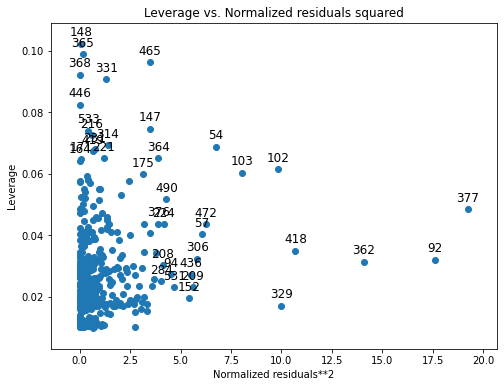

In [81]:
fig, ax = plt.subplots(figsize=(8, 6))
fig = plot_leverage_resid2(lm, ax=ax)

上圖 x 軸是 residuals (表示 Outlier)，y 軸是 leverage

## 2. Bonferroni outlier test 

課本:   
Running a Bonferroni outlier test will give us p-values for each observation, and   
those observations with p value < 0.05 are the outliers affecting the accuracy

In [82]:
test = lm.outlier_test()

In [83]:
test # a data frame

,student_resid,unadj_p,bonf(p)
494,-0.421661,0.673487,1.0
50,-1.173878,0.241105,1.0
535,-0.642600,0.520832,1.0
73,-0.467335,0.640501,1.0
65,-0.643363,0.520337,1.0
...,...,...,...
448,-0.346782,0.728928,1.0
171,-0.197745,0.843340,1.0
314,-1.153737,0.249260,1.0
22,-1.586345,0.113408,1.0


In [84]:
print("Bad data points (bonf(p) < 0.05): ")
print(test[test['bonf(p)']<0.05])

Bad data points (bonf(p) < 0.05): 
     student_resid   unadj_p   bonf(p)
92        4.339075  0.000018  0.007811
377       4.581086  0.000006  0.002657


## 6.3 Homoscedasticity and Normality

Homoscedasticity 須滿足:
- The error variance is constant. 
- The error should be normally distributed.

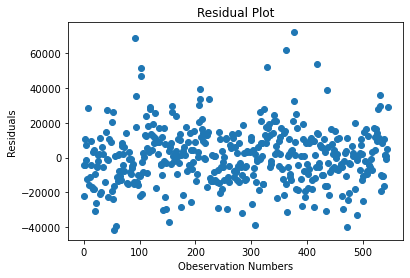

(array([2.01713873e-06, 6.45484393e-06, 1.77508208e-05, 2.72313728e-05,
        2.25919538e-05, 7.05998555e-06, 3.02570809e-06, 6.05141618e-07,
        6.05141618e-07, 6.05141618e-07]),
 array([-41587.58503598, -30217.1326726 , -18846.68030922,  -7476.22794584,
          3894.22441754,  15264.67678092,  26635.1291443 ,  38005.58150768,
         49376.03387106,  60746.48623444,  72116.93859782]),
 <BarContainer object of 10 artists>)

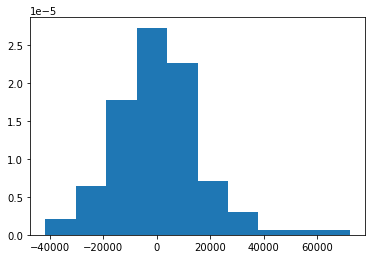

In [85]:
plt.plot(lm.resid, 'o')

plt.title("Residual Plot")
plt.xlabel("Obeservation Numbers")
plt.ylabel("Residuals")

plt.show()
plt.hist(lm.resid, density=True, stacked=True) # 畫出 error term 的分布 (It shold look like normally distributed!)

from 官方 document:  
> If True, draw and return a probability density: each bin will display the bin's raw count divided by the total number of   counts and the bin width (density = counts / (sum(counts) * np.diff(bins))), so that the area under the histogram integrates to 1 (np.sum(density * np.diff(bins)) == 1).  
If stacked is also True, the sum of the histograms is normalized to 1.

## 6.4 Linearity: 
- the relationships between the predictors and the outcome variables should be linear. 
- 如果發現不 linear，就要考慮用 log, square root, high 就要考慮用 log, square root, higher order polynominals 

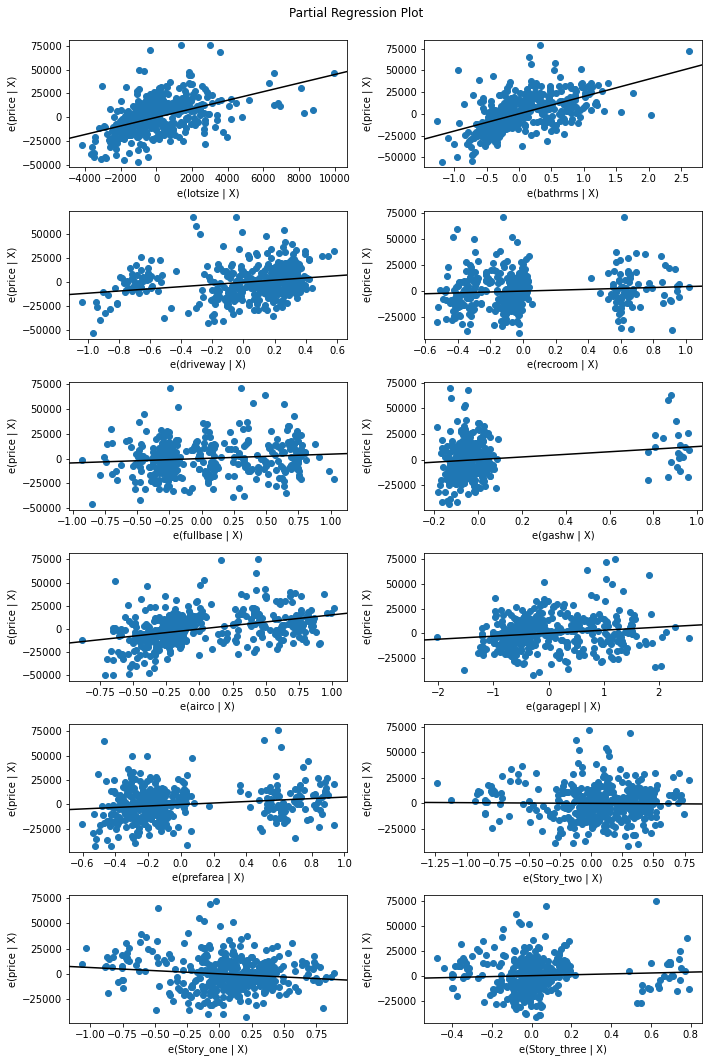

In [86]:
fig = plt.figure(figsize=(10, 15))
fig = sm.graphics.plot_partregress_grid(lm, fig=fig)

# <補> Regularization

[參考影片](https://www.youtube.com/watch?v=Q81RR3yKn30)

Cross Validation: 
在做機器學習時，有許多不同的 models 可以選擇，比如: Logistic Regression, K-nearest neighbors, SVM 等。要選哪一個好呢?  
- 同時，要如何決定 training data 與 testing data 的比例?  
- ANS: 做 <font color='red'> Cross Validation </font>。  
- 具體來說，cross validation 會把資料分成許多不同比例 (比如 traing/testing = 5:5, 6:4,...) 並套用到各種 models (如 Logistic Regression, SVM,...) 並找出哪一個組合有 least squared。  
- 
```Four-Fold Cross Validation```: 將資料分成四等分，讓機器去找最佳組合  
```Ten Fold  Cross Validation```  
```Leave One Out Cross Validation```

### Ridge Regression:

套用 model 時，會有 <font color='red'> overfitting </font> 的問題:  
解決方法: introduce a small amount of bias into how the new ine is fit to the data  
這樣就可以: lower the variance (這裡的 variance 是指 testing data 與 model 所 fit 出來的線的 variance)  
具體來說: minimize the $$sum\ of\ square\ residuals + \lambda \times slope^{2}\ where\ \lambda = [0, \infty]$$  
---
In general:   
model: $y = \beta_{0} + \beta_{1} \times x_{1}+ \beta_{2} \times x_{2} + ... + \beta_{n} \times x_{n}$  
minimize: $$sum\ of\ square\ residuals + \lambda \times [(slope\ for\ \beta_{1})^2 + (slope\ for\ \beta_{2})^2 + ... + (slope\ for\ \beta_{n})^2]\ where\ \lambda = [0, \infty] $$

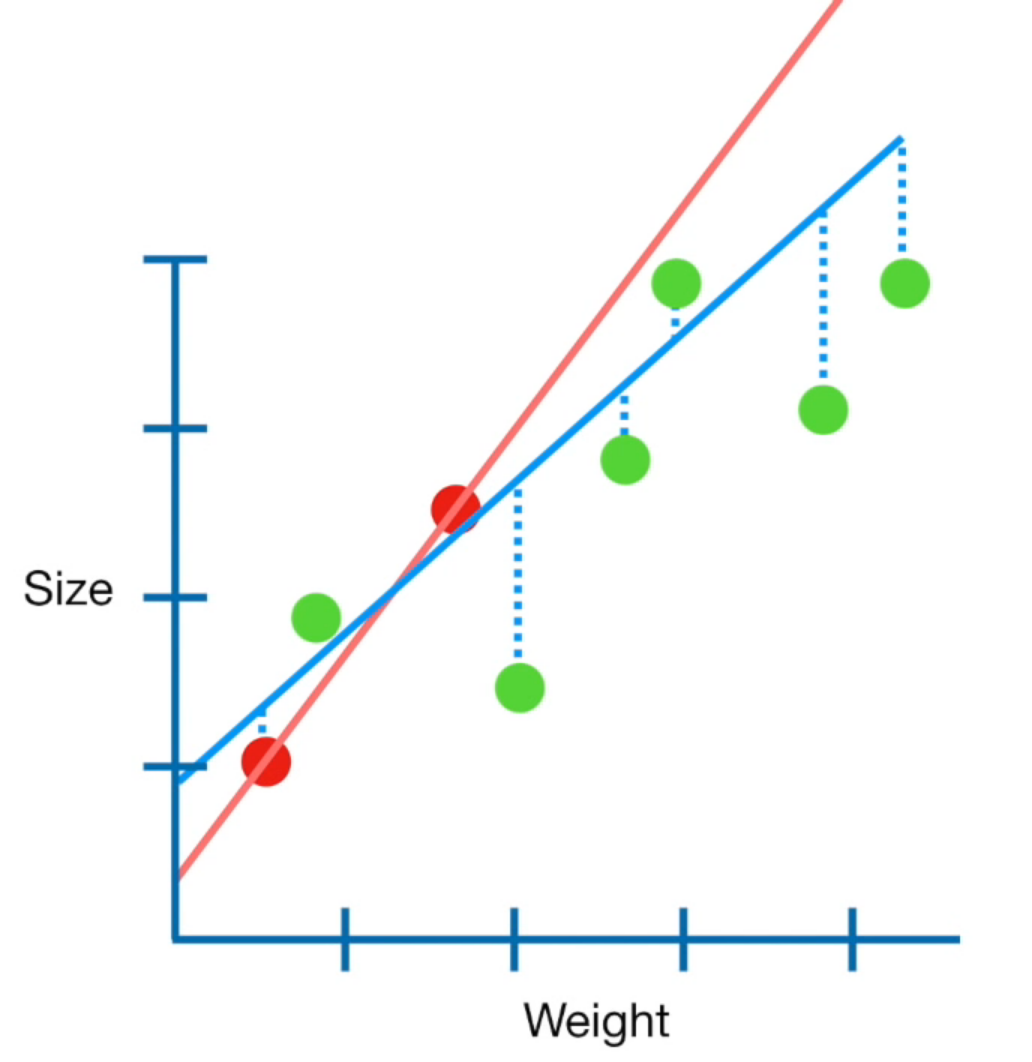

- 同上圖可以看出，<font color='red'> 紅線 </font> 是原始的 least squre 所 fit 出的線，<font color='blue'> 藍線 </font> 是 Ridge Regression 所 fit 的線。藍線的斜率會變得比較小，這代表每單位 Weight 的改變，對 Size 的影響較小 (Size 對 Weight 的改變較不敏感)。  
- 當 $\lambda$ 越來越大，Ridge Regresson fit 出來的線，其斜率會越來越小，當 <font color='red'>$\lambda=\infty$ </font>時，結果就會是一條水平線。
- 那要如何決定 $\lambda$? ANS: 定義許多不同的 $\lambda$ 並做 cross validation (通常是用 ``Ten Fold  Cross Validation```)

以下使用 ```Grade_Set_2.csv``` 做 Regularization:

In [87]:
df = pd.read_csv(r"C:\Users\User\Machine_Learning\mastering-ml-w-python-in-six-steps-2e-master\Chapter_3_Code\Code\Data\Grade_Set_2.csv")
df

,Hours_Studied,Test_Grade
0,0.5,20
1,1.0,21
2,2.0,22
3,3.0,23
4,4.0,25
5,5.0,37
6,6.0,48
7,7.0,56
8,8.0,67
9,9.0,76


In [88]:
df.columns=['x', 'y']
df.shape

(13, 2)

In [89]:
# 故意製造多次方的解釋變數
for i in range(2,50): # power of 1 is already there
    colname = 'x_%d'%i # new var will be x_power
    df[colname] = df['x']**i
df

,x,y,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_40,x_41,x_42,x_43,x_44,x_45,x_46,x_47,x_48,x_49
0,0.5,20,0.25,0.125,0.0625,0.03125,1.562500e-02,7.812500e-03,3.906250e-03,1.953125e-03,...,9.094947e-13,4.547474e-13,2.273737e-13,1.136868e-13,5.684342e-14,2.842171e-14,1.421085e-14,7.105427e-15,3.552714e-15,1.776357e-15
1,1.0,21,1.00,1.000,1.0000,1.00000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
2,2.0,22,4.00,8.000,16.0000,32.00000,6.400000e+01,1.280000e+02,2.560000e+02,5.120000e+02,...,1.099512e+12,2.199023e+12,4.398047e+12,8.796093e+12,1.759219e+13,3.518437e+13,7.036874e+13,1.407375e+14,2.814750e+14,5.629500e+14
3,3.0,23,9.00,27.000,81.0000,243.00000,7.290000e+02,2.187000e+03,6.561000e+03,1.968300e+04,...,1.215767e+19,3.647300e+19,1.094190e+20,3.282570e+20,9.847709e+20,2.954313e+21,8.862938e+21,2.658881e+22,7.976644e+22,2.392993e+23
4,4.0,25,16.00,64.000,256.0000,1024.00000,4.096000e+03,1.638400e+04,6.553600e+04,2.621440e+05,...,1.208926e+24,4.835703e+24,1.934281e+25,7.737125e+25,3.094850e+26,1.237940e+27,4.951760e+27,1.980704e+28,7.922816e+28,3.169127e+29
5,5.0,37,25.00,125.000,625.0000,3125.00000,1.562500e+04,7.812500e+04,3.906250e+05,1.953125e+06,...,9.094947e+27,4.547474e+28,2.273737e+29,1.136868e+30,5.684342e+30,2.842171e+31,1.421085e+32,7.105427e+32,3.552714e+33,1.776357e+34
6,6.0,48,36.00,216.000,1296.0000,7776.00000,4.665600e+04,2.799360e+05,1.679616e+06,1.007770e+07,...,1.336749e+31,8.020497e+31,4.812298e+32,2.887379e+33,1.732427e+34,1.039456e+35,6.236738e+35,3.742043e+36,2.245226e+37,1.347135e+38
7,7.0,56,49.00,343.000,2401.0000,16807.00000,1.176490e+05,8.235430e+05,5.764801e+06,4.035361e+07,...,6.366806e+33,4.456764e+34,3.119735e+35,2.183814e+36,1.528670e+37,1.070069e+38,7.490483e+38,5.243338e+39,3.670337e+40,2.569236e+41
8,8.0,67,64.00,512.000,4096.0000,32768.00000,2.621440e+05,2.097152e+06,1.677722e+07,1.342177e+08,...,1.329228e+36,1.063382e+37,8.507059e+37,6.805647e+38,5.444518e+39,4.355614e+40,3.484491e+41,2.787593e+42,2.230075e+43,1.784060e+44
9,9.0,76,81.00,729.000,6561.0000,59049.00000,5.314410e+05,4.782969e+06,4.304672e+07,3.874205e+08,...,1.478088e+38,1.330279e+39,1.197252e+40,1.077526e+41,9.697737e+41,8.727964e+42,7.855167e+43,7.069650e+44,6.362685e+45,5.726417e+46


In [99]:
independent_variables = list(df.columns)
independent_variables.remove('y')

X= df[independent_variables] # independent variable
y= df.y # dependent variable

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, 
random_state=1)

Recall:  
- ``` Mean Absolute Error (MAE)```: $MAE = \sum_{i=1}^{n} |\hat{y_{i}}-y_{i}|\$ 

- ``` Mean Square Error (MSE)```: $MSE = \sum_{i=1}^{n} |\hat{y_{i}}-y_{i}|^2\$

In [102]:
from sklearn import linear_model
# Ridge Regression:
lr = linear_model.Ridge(alpha=0.001) # alpha 即為上面的 lambda
lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print("------ Ridge Regression ------")
print("Train MAE: ", mean_absolute_error(y_train, y_train_pred)) # result for training y
print("Train RMSE: ", np.sqrt(mean_squared_error(y_train, 
y_train_pred)))

print("  ")
print("Test MAE: ", mean_absolute_error(y_test, y_test_pred)) # result for testing y
print("Test RMSE: ", np.sqrt(mean_squared_error(y_test, 
y_test_pred)))

print("  ")
print("Ridge Coef: ", lr.coef_)

------ Ridge Regression ------
Train MAE:  12.775326528414379
Train RMSE:  16.72063936357992
  
Test MAE:  22.397943556789926
Test RMSE:  22.432642089791898
  
Ridge Coef:  [ 1.01446487e-88  1.27690319e-87  1.41113660e-86  1.49319913e-85
  1.54589299e-84  1.58049535e-83  1.60336716e-82  1.61825366e-81
  1.62742313e-80  1.63228352e-79  1.63372709e-78  1.63232721e-77
  1.62845333e-76  1.62233965e-75  1.61412730e-74  1.60389073e-73
  1.59165478e-72  1.57740595e-71  1.56110004e-70  1.54266755e-69
  1.52201757e-68  1.49904080e-67  1.47361205e-66  1.44559243e-65
  1.41483164e-64  1.38117029e-63  1.34444272e-62  1.30448024e-61
  1.26111524e-60  1.21418622e-59  1.16354417e-58  1.10906042e-57
  1.05063662e-56  9.88217010e-56  9.21803842e-55  8.51476330e-54
  7.77414158e-53  6.99926407e-52  6.19487106e-51  5.36778815e-50
  4.52745955e-49  3.68659929e-48  2.86198522e-47  2.07542549e-46
  1.35493365e-45  7.36155358e-45  2.64098894e-44 -4.76790286e-45
  2.09597530e-46]


C:\Users\User\Anaconda3\envs\machineLearning\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


### Lasso Regression:

$$sum\ of\ square\ residuals + \lambda \times |slope|\ \lambda = [0, \infty]$$

Lasso Regression 的做法跟 Ridge Regression 非常像，只是 Lasso 的 penalty term 是取斜率的絕對值。  
這樣做的好處: Suppose $Size = 截距+slope \times Weight + 黃道十二宮 \times sign$。我們知道第二個 independent variable 不可能可以解釋 Size，此時 Lasso Regression 就會讓 slope for 黃道十二宮在 $\lambda$ 很大時，變得很小，進而使這個變數消失。